Fase 3 - Aula 01
Introdução ao Aprendizado Supervisionado

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error

In [3]:
df = pd.DataFrame({
    "A":3,
    "B": pd.Timestamp("20240101"),
    "C":pd.Series(2,index=list(range(4)),dtype="float32"),
    "D":np.array([5] * 4, dtype="int32"),
    "E": pd.Categorical(["train","test","test","train"]),
    "F":"foo"})

In [4]:
df

,A,B,C,D,E,F
0,3,2024-01-01,2.0,5,train,foo
1,3,2024-01-01,2.0,5,test,foo
2,3,2024-01-01,2.0,5,test,foo
3,3,2024-01-01,2.0,5,train,foo


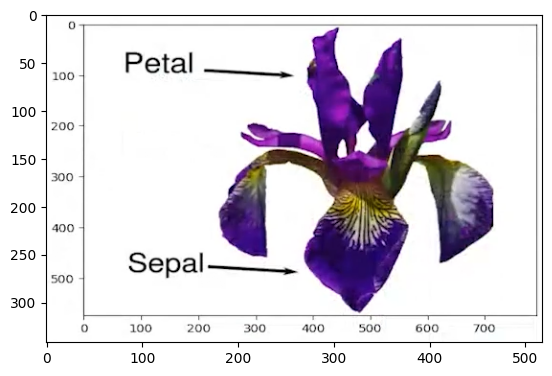

In [6]:
im = plt.imread('./img/parts_iris_flower.png')
plt.imshow(im)

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [21]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype        
---  ------  --------------  -----        
 0   A       4 non-null      int64        
 1   B       4 non-null      datetime64[s]
 2   C       4 non-null      float32      
 3   D       4 non-null      int32        
 4   E       4 non-null      category     
 5   F       4 non-null      object       
dtypes: category(1), datetime64[s](1), float32(1), int32(1), int64(1), object(1)
memory usage: 288.0+ bytes


In [10]:
df = pd.read_csv('iris.data')

df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [22]:
df = pd.read_csv('iris.data',header=None)

In [23]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
df.columns = ['comprim_sepala', 'largura_sepala','comprim_petala','largura_petala','classe']

In [27]:
df

,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [29]:
df.tail()

,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [30]:
df.iloc[0]

,0
comprim_sepala,5.1
largura_sepala,3.5
comprim_petala,1.4
largura_petala,0.2
classe,Iris-setosa


In [33]:
df.iloc[5]

,5
comprim_sepala,5.4
largura_sepala,3.9
comprim_petala,1.7
largura_petala,0.4
classe,Iris-setosa


In [34]:
df.iloc[[0,5]]

,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [28]:
df['classe'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [31]:
df[['largura_sepala', 'largura_petala', 'comprim_petala']]

,largura_sepala,largura_petala,comprim_petala
0,3.5,0.2,1.4
1,3.0,0.2,1.4
2,3.2,0.2,1.3
3,3.1,0.2,1.5
4,3.6,0.2,1.4
...,...,...,...
145,3.0,2.3,5.2
146,2.5,1.9,5.0
147,3.0,2.0,5.2
148,3.4,2.3,5.4


In [36]:
ind_list = [0,1,2,3,4,5,50,51,52,53,54,55,100,101,102,103,104,105]
df.iloc[ind_list]

,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor


In [37]:
df['comprim_petala']

#df['comprim_petala'].iloc[149]
df['comprim_petala'].iloc[0]


1.4

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   comprim_sepala  150 non-null    float64
 1   largura_sepala  150 non-null    float64
 2   comprim_petala  150 non-null    float64
 3   largura_petala  150 non-null    float64
 4   classe          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.shape

(4, 6)

In [41]:
df['comprim_petala'].iloc[149]

5.1

In [42]:
df['comprim_petala'].head()

,comprim_petala
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4


<Axes: >

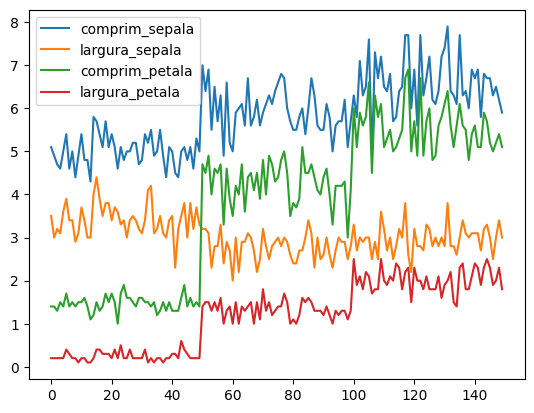

In [39]:
df.plot()

<Axes: >

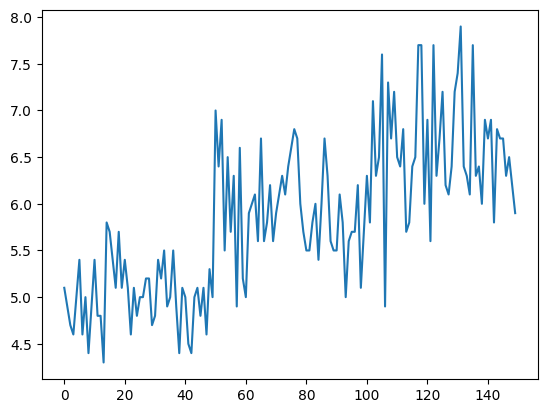

In [40]:
df['comprim_sepala'].plot()


<Axes: ylabel='Frequency'>

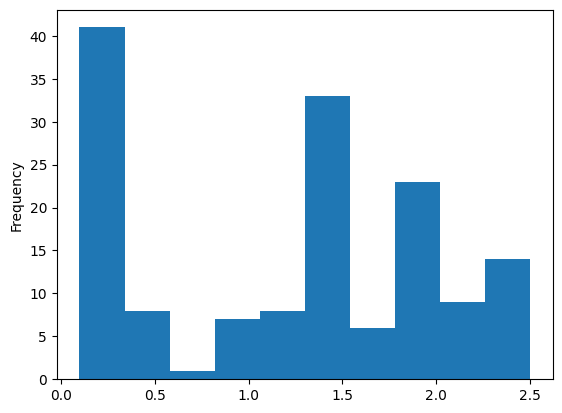

In [43]:
df['largura_petala'].plot(kind='hist')
# hist - histograma, valores mostra a frequencia dado a categoria

In [44]:
df['largura_petala'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [45]:
df[df['largura_petala'] == 1.1]

,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
69,5.6,2.5,3.9,1.1,Iris-versicolor
80,5.5,2.4,3.8,1.1,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [46]:
df.query('largura_petala == 1.1')


,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
69,5.6,2.5,3.9,1.1,Iris-versicolor
80,5.5,2.4,3.8,1.1,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [47]:
df[(df['largura_petala']>1.1)&(df['largura_petala']<1.4)]

,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
53,5.5,2.3,4.0,1.3,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
64,5.6,2.9,3.6,1.3,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor
73,6.1,2.8,4.7,1.2,Iris-versicolor
74,6.4,2.9,4.3,1.3,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor
87,6.3,2.3,4.4,1.3,Iris-versicolor
88,5.6,3.0,4.1,1.3,Iris-versicolor


In [48]:
df.describe()

,comprim_sepala,largura_sepala,comprim_petala,largura_petala
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


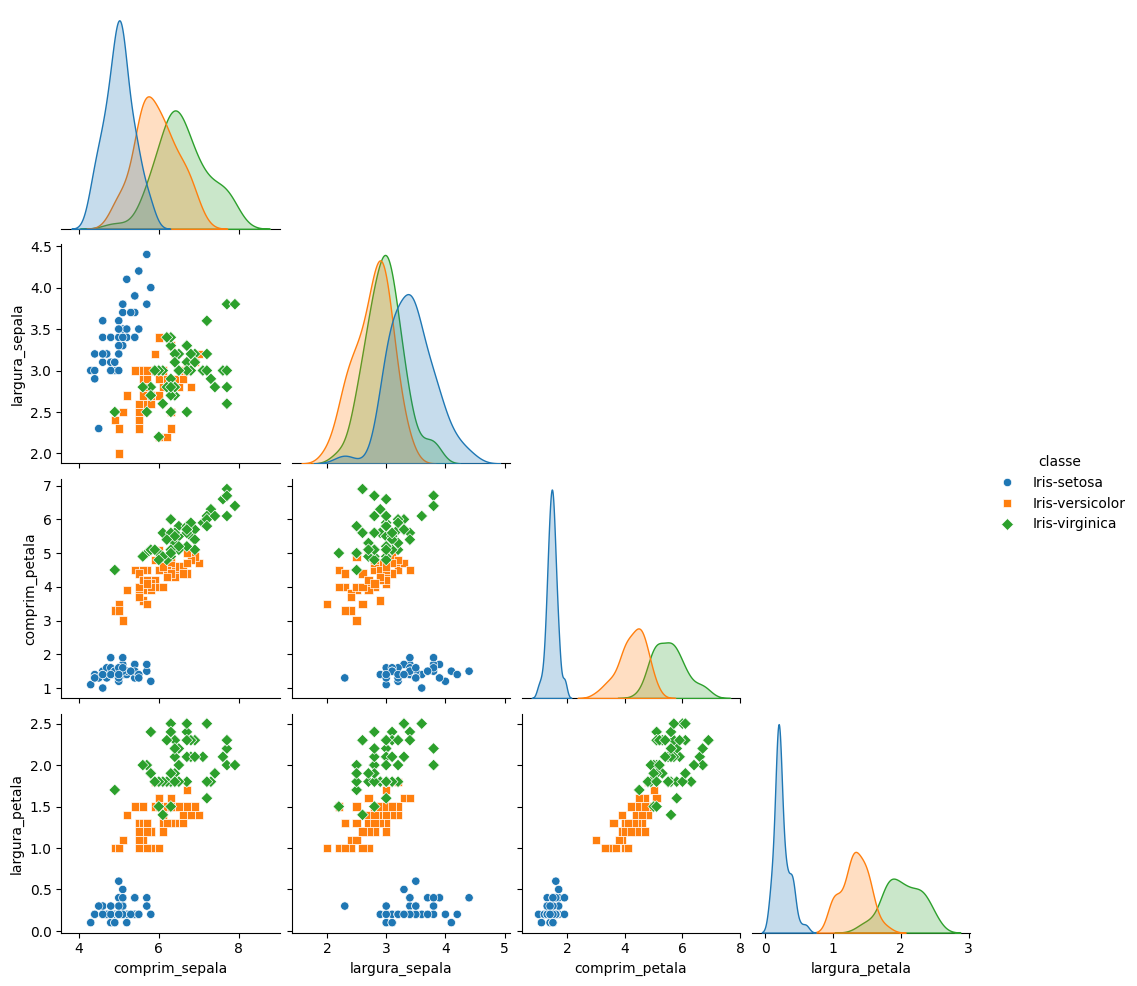

In [49]:
sns.pairplot(df, hue='classe', markers=["o", "s","D"], corner=True)